In [156]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

!unzip nlp_getting_started.zip

--2022-07-06 12:18:47--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.3’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-07-06 12:18:47 (133 MB/s) - ‘nlp_getting_started.zip.3’ saved [607343/607343]

Archive:  nlp_getting_started.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [157]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [158]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [159]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [160]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [161]:
train_df_shuffled = train_df.sample(frac=1)

In [162]:
# visualize 5 random data at once
import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Text: {text}")
  print(f"Target: {target}")
  print("\n-----------------\n")

Text: I'm gonna fight Taylor as soon as I get there.
Target: 0

-----------------

Text: Bigamist and his 'first' wife are charged in the deaths of his 'second' pregnant wife her child 8 her mothe... http://t.co/rTEuGB5Tnv
Target: 1

-----------------

Text: The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'
Target: 0

-----------------

Text: @kathrynschulz Plus you're well out of the inundation zone amirite?
Target: 0

-----------------

Text: Another entity forced to close in Montego Bay as a result of the collapsed sewer line #TVJNews
Target: 1

-----------------



In [163]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_target, val_target = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1)

In [164]:
len(train_sentences), len(val_sentences)

(6851, 762)

## Tokenization

In [165]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [166]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_num_vocabs = 10000
max_seq_length = 15
text_vectorizer = TextVectorization(max_tokens=max_num_vocabs,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=max_seq_length,
                                    pad_to_max_tokens=True)
text_vectorizer

In [167]:
text_vectorizer.adapt(train_sentences)

In [168]:
len(text_vectorizer.get_vocabulary())

10000

In [169]:
text_vectorizer("hello people of the world")

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([2097,   54,    6,    2,  105,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])>

In [170]:
top_5_words = text_vectorizer.get_vocabulary()[:5]
top_5_words

['', '[UNK]', 'the', 'a', 'in']

In [171]:
bottom_5_words = text_vectorizer.get_vocabulary()[-5:]
bottom_5_words

['paratroopers', 'paranormal', 'paramore', 'paramedics', 'paraguay']

## Embedding

In [172]:
embedding = tf.keras.layers.Embedding(input_dim=max_num_vocabs,
                                      output_dim=128,
                                      embeddings_initializer="uniform",
                                      input_length=max_seq_length)
embedding

In [173]:
embedding(text_vectorizer("hello people of the world"))

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.0049145 ,  0.02258955,  0.00117501, ..., -0.02745768,
        -0.02144711,  0.0157345 ],
       [-0.00864525, -0.01299028, -0.01768043, ..., -0.04750764,
        -0.02952007, -0.03257384],
       [ 0.00502395, -0.01672832,  0.02207117, ...,  0.00402254,
        -0.02389314, -0.01286048],
       ...,
       [-0.01630668,  0.00538598,  0.02210209, ..., -0.00683714,
         0.0081185 , -0.00758881],
       [-0.01630668,  0.00538598,  0.02210209, ..., -0.00683714,
         0.0081185 , -0.00758881],
       [-0.01630668,  0.00538598,  0.02210209, ..., -0.00683714,
         0.0081185 , -0.00758881]], dtype=float32)>

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_target)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [175]:
model_0.score(val_sentences, val_target)

0.7795275590551181

In [176]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {
      "accuracy": model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "fscore": model_fscore
  }

  return model_results

In [177]:
y_pred = model_0.predict(val_sentences)
y_pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [178]:
val_target[:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [179]:
result_0 = calculate_results(val_target, y_pred)
result_0

{'accuracy': 77.95275590551181,
 'fscore': 0.7721426327262363,
 'precision': 0.7922076085347884,
 'recall': 0.7795275590551181}

### Model 1: Simple Feed-forward model

In [180]:
import tensorflow.keras.layers as lyrs

inputs = lyrs.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = embedding(text_vectorizer(inputs))
x = lyrs.GlobalAveragePooling1D(name="pooling_layer")(x)
outputs = lyrs.Dense(1, activation="sigmoid", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [181]:
model_1.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 pooling_layer (GlobalAverag  (None, 128)              0         
 ePooling1D)                                                     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tr

In [182]:
history_1 = model_1.fit(train_sentences,
                        train_target,
                        epochs=8,
                        validation_data=(val_sentences, val_target))

Epoch 1/8
215/215 [==============================] - 3s 12ms/step - loss: 0.6120 - accuracy: 0.6919 - val_loss: 0.5436 - val_accuracy: 0.7520
Epoch 2/8
215/215 [==============================] - 2s 11ms/step - loss: 0.4415 - accuracy: 0.8200 - val_loss: 0.4881 - val_accuracy: 0.7730
Epoch 3/8
215/215 [==============================] - 3s 12ms/step - loss: 0.3458 - accuracy: 0.8608 - val_loss: 0.4843 - val_accuracy: 0.7730
Epoch 4/8
215/215 [==============================] - 3s 12ms/step - loss: 0.2816 - accuracy: 0.8910 - val_loss: 0.5046 - val_accuracy: 0.7730
Epoch 5/8
215/215 [==============================] - 3s 12ms/step - loss: 0.2341 - accuracy: 0.9150 - val_loss: 0.5316 - val_accuracy: 0.7664
Epoch 6/8
215/215 [==============================] - 3s 12ms/step - loss: 0.1970 - accuracy: 0.9299 - val_loss: 0.5682 - val_accuracy: 0.7598
Epoch 7/8
215/215 [==============================] - 3s 12ms/step - loss: 0.1674 - accuracy: 0.9419 - val_loss: 0.6091 - val_accuracy: 0.7507
Epoch 

In [183]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

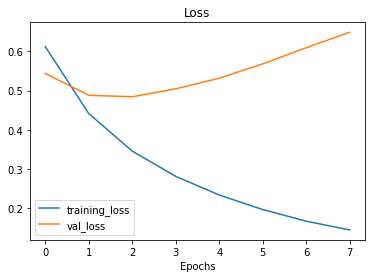

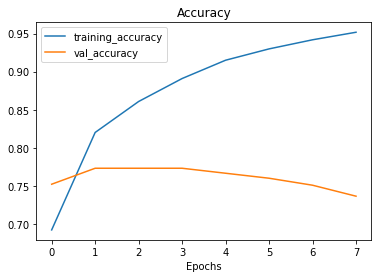

In [184]:
plot_loss_curves(history_1)

In [185]:
model_1.evaluate(val_sentences, val_target)

24/24 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7362


[0.6486973166465759, 0.7362204790115356]

In [186]:
y_pred = tf.round(tf.squeeze(model_1.predict(val_sentences)))
y_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 0., 1., 0.], dtype=float32)>

In [187]:
result_1 = calculate_results(val_target, y_pred)
result_1

{'accuracy': 73.62204724409449,
 'fscore': 0.7348351809238328,
 'precision': 0.7350609737403991,
 'recall': 0.7362204724409449}

In [188]:
model_1.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 pooling_layer (GlobalAverag  (None, 128)              0         
 ePooling1D)                                                     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tr

In [189]:
embed_weights = model_1.layers[2].get_weights()[0]
embed_weights.shape

(10000, 128)

In [190]:
# # Visualize embedding in http://projector.tensorflow.org/
# import io

# words_in_vocab = text_vectorizer.get_vocabulary()

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model 2: LSTM

In [191]:
inputs = lyrs.Input(shape=(1,), dtype="string")
x = embedding(text_vectorizer(inputs))
x = lyrs.LSTM(128, return_sequences=True)(x)
x = lyrs.LSTM(64)(x)
outputs = lyrs.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

model_2.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_15 (LSTM)              (None, 15, 128)           131584    
                                                                 
 lstm_16 (LSTM)              (None, 64)                49408     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                          

In [192]:
history_2 = model_2.fit(train_sentences,
            train_target,
            epochs=8,
            validation_data=(val_sentences, val_target))

Epoch 1/8
215/215 [==============================] - 12s 39ms/step - loss: 0.2519 - accuracy: 0.9410 - val_loss: 0.6962 - val_accuracy: 0.7388
Epoch 2/8
215/215 [==============================] - 8s 36ms/step - loss: 0.1123 - accuracy: 0.9580 - val_loss: 0.7596 - val_accuracy: 0.7454
Epoch 3/8
215/215 [==============================] - 8s 37ms/step - loss: 0.1014 - accuracy: 0.9609 - val_loss: 0.8048 - val_accuracy: 0.7415
Epoch 4/8
215/215 [==============================] - 8s 35ms/step - loss: 0.0945 - accuracy: 0.9638 - val_loss: 0.9085 - val_accuracy: 0.7467
Epoch 5/8
215/215 [==============================] - 8s 35ms/step - loss: 0.0888 - accuracy: 0.9656 - val_loss: 0.8716 - val_accuracy: 0.7428
Epoch 6/8
215/215 [==============================] - 8s 36ms/step - loss: 0.0841 - accuracy: 0.9680 - val_loss: 0.8932 - val_accuracy: 0.7402
Epoch 7/8
215/215 [==============================] - 15s 69ms/step - loss: 0.0795 - accuracy: 0.9692 - val_loss: 0.9970 - val_accuracy: 0.7402
Epoc

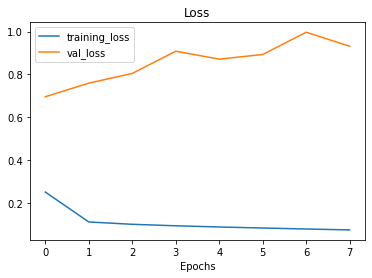

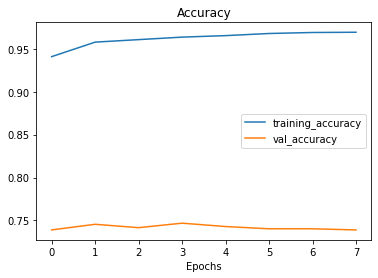

In [193]:
plot_loss_curves(history_2)

In [194]:
model_2.evaluate(val_sentences, val_target)

24/24 [==============================] - 0s 15ms/step - loss: 0.9317 - accuracy: 0.7388


[0.9316516518592834, 0.73884516954422]

In [195]:
y_pred = tf.squeeze(tf.round(model_2.predict(val_sentences)))
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 1., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [196]:
result_2 = calculate_results(val_target, y_pred)
result_2

{'accuracy': 73.88451443569554,
 'fscore': 0.7379780332025617,
 'precision': 0.7378552710153069,
 'recall': 0.7388451443569554}

### Model 3: GRU

In [197]:
inputs = lyrs.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = lyrs.GRU(128, return_sequences=True)(x)
x = lyrs.GRU(64)(x)
outputs = lyrs.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

model_3.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_9 (GRU)                 (None, 15, 128)           99072     
                                                                 
 gru_10 (GRU)                (None, 64)                37248     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                          

In [198]:
history_3 = model_3.fit(train_sentences,
                        train_target,
                        epochs=8,
                        validation_data=(val_sentences, val_target))

Epoch 1/8
215/215 [==============================] - 13s 43ms/step - loss: 0.2405 - accuracy: 0.9215 - val_loss: 0.8960 - val_accuracy: 0.7402
Epoch 2/8
215/215 [==============================] - 7s 31ms/step - loss: 0.0821 - accuracy: 0.9685 - val_loss: 0.9786 - val_accuracy: 0.7388
Epoch 3/8
215/215 [==============================] - 7s 31ms/step - loss: 0.0767 - accuracy: 0.9702 - val_loss: 0.9802 - val_accuracy: 0.7388
Epoch 4/8
215/215 [==============================] - 7s 31ms/step - loss: 0.0725 - accuracy: 0.9718 - val_loss: 1.0453 - val_accuracy: 0.7388
Epoch 5/8
215/215 [==============================] - 7s 31ms/step - loss: 0.0694 - accuracy: 0.9712 - val_loss: 1.0467 - val_accuracy: 0.7402
Epoch 6/8
215/215 [==============================] - 7s 31ms/step - loss: 0.0664 - accuracy: 0.9729 - val_loss: 1.0546 - val_accuracy: 0.7428
Epoch 7/8
215/215 [==============================] - 7s 31ms/step - loss: 0.0639 - accuracy: 0.9745 - val_loss: 1.1130 - val_accuracy: 0.7336
Epoch

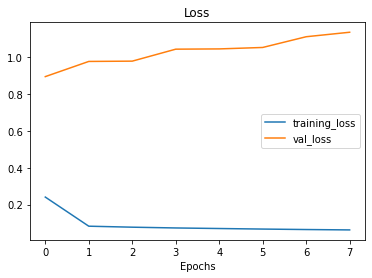

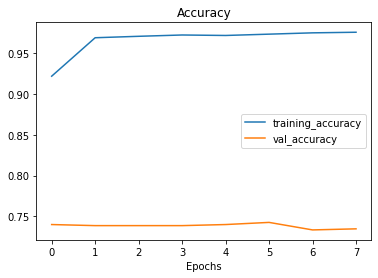

In [199]:
plot_loss_curves(history_3)

In [200]:
y_pred = tf.squeeze(tf.round(model_3.predict(val_sentences)))
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 1., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [201]:
result_3 = calculate_results(val_target, y_pred)
result_3

{'accuracy': 73.49081364829397,
 'fscore': 0.7338433754887692,
 'precision': 0.7338046965864936,
 'recall': 0.7349081364829396}

### Model 4: Bidirectional

In [202]:
inputs = lyrs.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = lyrs.Bidirectional(lyrs.LSTM(128, activation="tanh", return_sequences=True))(x)
x = lyrs.Bidirectional(lyrs.GRU(64, activation="tanh", return_sequences=True))(x)
x = lyrs.Bidirectional(lyrs.LSTM(32, activation="tanh"))(x)
outputs = lyrs.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs)
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

model_4.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_12 (Bidirecti  (None, 15, 256)          263168    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 15, 128)          123648    
 onal)                                                           
                                                          

In [203]:
history_4 = model_4.fit(train_sentences,
                        train_target,
                        epochs=8,
                        validation_data=(val_sentences, val_target))

Epoch 1/8
215/215 [==============================] - 29s 93ms/step - loss: 0.1976 - accuracy: 0.9502 - val_loss: 0.8608 - val_accuracy: 0.7336
Epoch 2/8
215/215 [==============================] - 16s 75ms/step - loss: 0.0694 - accuracy: 0.9746 - val_loss: 0.9125 - val_accuracy: 0.7310
Epoch 3/8
215/215 [==============================] - 16s 77ms/step - loss: 0.0638 - accuracy: 0.9764 - val_loss: 0.9796 - val_accuracy: 0.7283
Epoch 4/8
215/215 [==============================] - 16s 75ms/step - loss: 0.0604 - accuracy: 0.9774 - val_loss: 1.0123 - val_accuracy: 0.7257
Epoch 5/8
215/215 [==============================] - 16s 76ms/step - loss: 0.0571 - accuracy: 0.9777 - val_loss: 1.1079 - val_accuracy: 0.7231
Epoch 6/8
215/215 [==============================] - 17s 78ms/step - loss: 0.0552 - accuracy: 0.9777 - val_loss: 1.1440 - val_accuracy: 0.7244
Epoch 7/8
215/215 [==============================] - 16s 75ms/step - loss: 0.0527 - accuracy: 0.9790 - val_loss: 1.1688 - val_accuracy: 0.7283

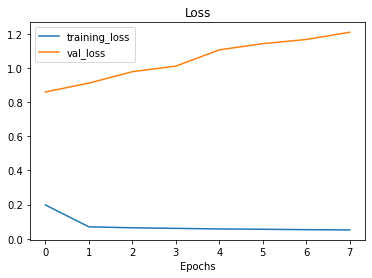

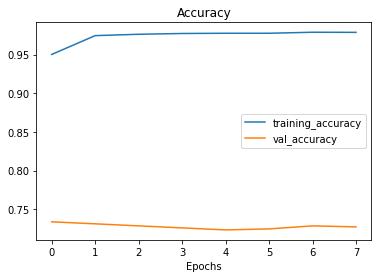

In [204]:
plot_loss_curves(history_4)

In [205]:
y_pred = tf.squeeze(tf.round(model_4.predict(val_sentences)))
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0.], dtype=float32)>

In [206]:
result_4 = calculate_results(val_target, y_pred)
result_4

{'accuracy': 72.70341207349081,
 'fscore': 0.7259377331765544,
 'precision': 0.7258556752858123,
 'recall': 0.7270341207349081}

### Model 5: Conv1D

In [207]:
inputs = lyrs.Input(shape=(1,), dtype=tf.string)
x = embedding(text_vectorizer(inputs))
x = lyrs.Conv1D(filters=33, kernel_size=5, activation="relu")(x)
x = lyrs.GlobalMaxPool1D()(x)
outputs = lyrs.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs)
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 33)            21153     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 33)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_16 (Dense)            (None, 1)                 34 

In [208]:
history_5 = model_5.fit(train_sentences,
            train_target,
            epochs=5,
            validation_data=(val_sentences, val_target))

Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.1495 - accuracy: 0.9550 - val_loss: 0.9467 - val_accuracy: 0.7349
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0929 - accuracy: 0.9660 - val_loss: 1.1119 - val_accuracy: 0.7297
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0769 - accuracy: 0.9710 - val_loss: 1.2331 - val_accuracy: 0.7257
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0694 - accuracy: 0.9717 - val_loss: 1.2861 - val_accuracy: 0.7231
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0637 - accuracy: 0.9747 - val_loss: 1.3115 - val_accuracy: 0.7270


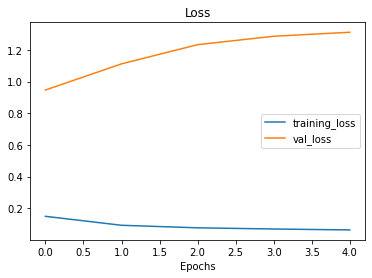

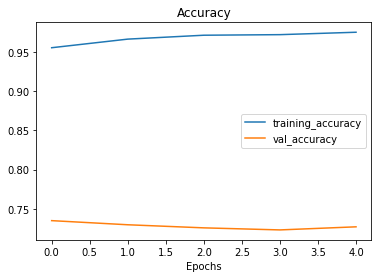

In [209]:
plot_loss_curves(history_5)

In [210]:
y_pred = tf.squeeze(tf.round(model_5.predict(val_sentences)))
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [211]:
result_5 = calculate_results(val_target, y_pred)
result_5

{'accuracy': 72.70341207349081,
 'fscore': 0.725530080880522,
 'precision': 0.7257462235522523,
 'recall': 0.7270341207349081}

### Model 6: USE preset

In [212]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE") 

sentence_encoder_layer

In [216]:
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  lyrs.Dense(64, activation="relu"),
  lyrs.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_17 (Dense)            (None, 64)                32832     
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [220]:
history_6 = model_6.fit(train_sentences,
                        train_target,
                        epochs=5,
                        validation_data=(val_sentences, val_target))

Epoch 1/5
215/215 [==============================] - 9s 20ms/step - loss: 0.4992 - accuracy: 0.7847 - val_loss: 0.4693 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4102 - accuracy: 0.8178 - val_loss: 0.4655 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3972 - accuracy: 0.8251 - val_loss: 0.4663 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3890 - accuracy: 0.8300 - val_loss: 0.4689 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3822 - accuracy: 0.8340 - val_loss: 0.4665 - val_accuracy: 0.7887


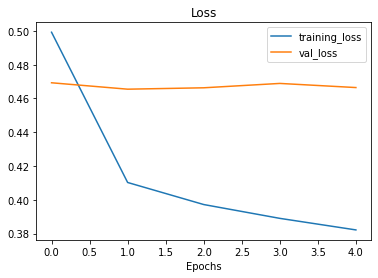

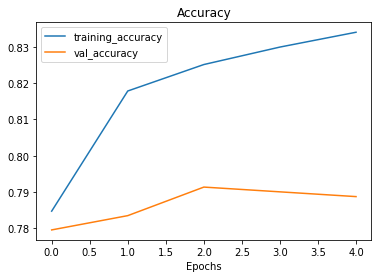

In [221]:
plot_loss_curves(history_6)

In [222]:
y_pred = tf.squeeze(tf.round(model_6.predict(val_sentences)))
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [223]:
result_6 = calculate_results(val_target, y_pred)
result_6

{'accuracy': 78.87139107611549,
 'fscore': 0.7864986736502211,
 'precision': 0.7894932924572293,
 'recall': 0.7887139107611548}

In [237]:
result_df = pd.DataFrame({
    "NaiveBayes": result_0,
    "FeedForward": result_1,
    "LSTM": result_2,
    "GRU": result_3,
    "BiDirectional": result_4,
    "Conv1D": result_5,
    "USE": result_6
})

result_df = result_df.T.sort_values("fscore", ascending=False)
result_df

,accuracy,precision,recall,fscore
USE,78.871391,0.789493,0.788714,0.786499
NaiveBayes,77.952756,0.792208,0.779528,0.772143
LSTM,73.884514,0.737855,0.738845,0.737978
FeedForward,73.622047,0.735061,0.736220,0.734835
GRU,73.490814,0.733805,0.734908,0.733843
BiDirectional,72.703412,0.725856,0.727034,0.725938
Conv1D,72.703412,0.725746,0.727034,0.725530


In [239]:
result_df[["precision", "recall", "fscore"]] *= 100

In [241]:
result_df

,accuracy,precision,recall,fscore
USE,78.871391,78.949329,78.871391,78.649867
NaiveBayes,77.952756,79.220761,77.952756,77.214263
LSTM,73.884514,73.785527,73.884514,73.797803
FeedForward,73.622047,73.506097,73.622047,73.483518
GRU,73.490814,73.380470,73.490814,73.384338
BiDirectional,72.703412,72.585568,72.703412,72.593773
Conv1D,72.703412,72.574622,72.703412,72.553008


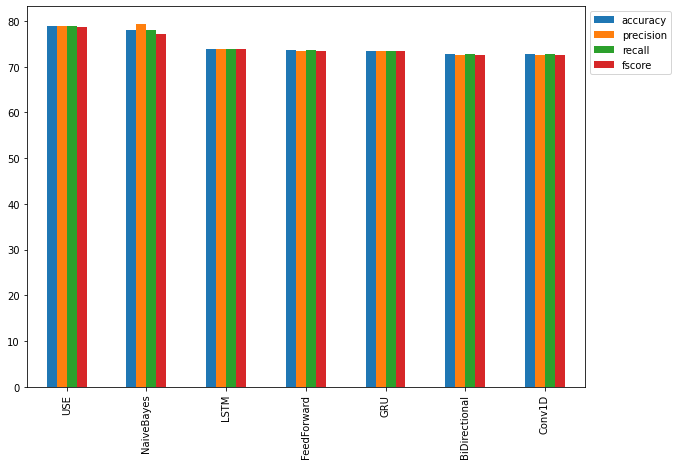

In [244]:
result_df.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))